## Project End Goal
> Be able to predict the prices of various used cars

## Importing Important Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as xgbr

import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('true_car_listings.csv')
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


## Exploratory Data Anslysis

In [18]:
data = data.drop('Vin', axis= 1)

In [19]:
data.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic


In [23]:
data.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

In [34]:
data.describe().round()

,Price,Year,Mileage
count,852122.0,852122.0,852122.0
mean,21464.0,2013.0,52508.0
std,13596.0,3.0,41989.0
min,1500.0,1997.0,5.0
25%,13000.0,2012.0,23836.0
50%,18500.0,2014.0,40256.0
75%,26995.0,2016.0,72186.0
max,499500.0,2018.0,2856196.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Make     852122 non-null  object
 6   Model    852122 non-null  object
dtypes: int64(3), object(4)
memory usage: 45.5+ MB


## Data Visualization

In [117]:
year_price = data.groupby('Year')['Price'].mean()
year_price.index.unique()
plt.scatter(year_price.index, year_price.values)
plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'index'

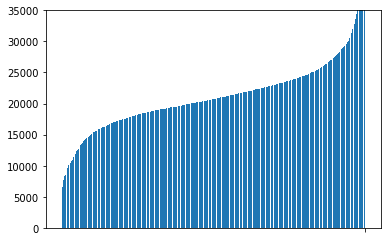

In [115]:
city_price = data.groupby('City')['Price'].mean().sort_values()
city_price.index.unique()
plt.bar(city_price.index, city_price.values)
plt.xticks('')
plt.ylim([0,35000])
plt.show()